In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
def plot_graph(df, name):
    plt.figure(figsize=(12.2, 4.5))
    x = np.arange(df.shape[0])
    for i in df.columns:
        plt.plot(x, df[i], color ='black', linestyle ='dashed', linewidth=1)
    plt.title(name)
    plt.xlabel('Iterations')
    plt.ylabel('Profit values')
    plt.xlim(0,500)
    name_of_graph = name.lower()+'_experiment_graph'
    # plt.savefig('name_of_graph', bbox_inches='tight')
    plt.show()

In [3]:
def get_stats(df):
    _max = df.iloc[-1].max()
    _min = df.iloc[-1].min()
    _mean = df.iloc[-1].mean()
    _median = np.median(df.iloc[-1])
    _stddev = round(df.iloc[-1].std(),2)
    return [_max, _min, _mean, _median, _stddev]

def get_iter_stats(df):
    _max = df.idxmax().max()
    _min = df.idxmax().min()
    _mean = round(df.idxmax().mean(),2)
    _median = round(np.median(df.idxmax()),2)
    _stddev = round(df.idxmax().std(),2)
    return [_max, _min, _mean, _median, _stddev]

In [4]:
cpso_ex = pd.read_excel('experiment_result_cpso_ex_2.xlsx', index_col=0, nrows=502)

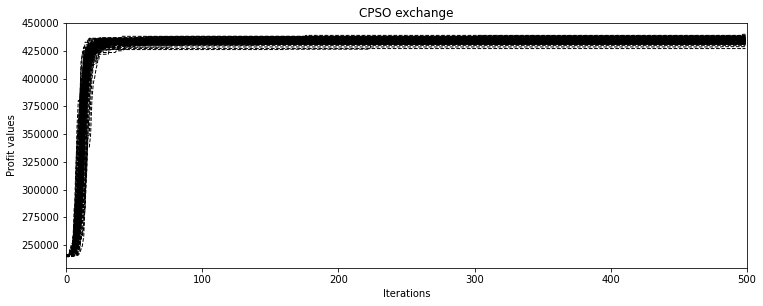

In [5]:
plot_graph(cpso_ex[:-1], 'CPSO exchange')

In [6]:
# bins_10 = [418500, 422000, 425500, 429000, 432500, 436000, 439500, 443000, 446500, 450000]
# bins_10 = [405000, 410000, 415000, 420000, 425000, 430000, 435000, 440000, 445000, 450000]
bins_20 = [i for i in np.arange(400000,450000,2500)]
bins_15 = np.linspace(start=415000,stop=450000,num=15).astype(np.int32)


In [7]:
def plot_histogram(data:pd.Series, title:str, bins:list) -> plt.Axes:
    ''' Plots the results of experiments'''
    fig, ax = plt.subplots(figsize=(10,5))

    data.plot.hist(density=False, ax=ax, color = 'silver', bins=bins, label='_nolegend_')
    ax.set_xticks(bins)
    
    x_labels = [x for x in (bins/1000).astype(np.int32)]
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('$ 000')

    ax.grid(color='white', lw = 0.5, axis='x')


    plt.axvline(data.mean(), color='dimgray', linestyle='--', label='Mean')
    plt.axvline(data.median(), color='dimgray', linestyle=':', label='Median')

    ax2 = ax.twinx()
    data.plot.kde(ax=ax2, legend=False, label='KDE', bw_method=0.5, color='black')

    ax.legend(loc=(0.85,0.85))
    ax2.legend(loc=(0.85,0.75))
    plt.title(title)
    plt.show()

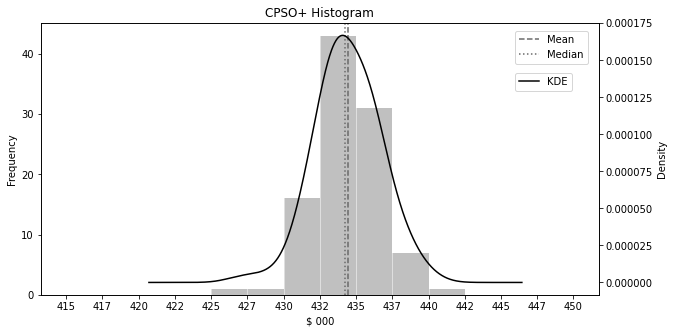

In [39]:
plot_histogram(data=cpso_ex[:-1].iloc[-1][:], title='CPSO+ Histogram', bins=bins_15)

In [61]:
def plot_pdf_graph(df:pd.DataFrame, bins:int, alg_name:str):
    
    _bins = np.linspace(start=400000, stop=450000, num=bins).astype(np.int32)

    fig, ax0 = plt.subplots(figsize=(10,5))
    mu = df[:-1].iloc[-1][:].mean()
    sigma = df[:-1].iloc[-1][:].std()
    bin_centers = 0.5*(_bins[1:] + _bins[:-1])
    pdf = stats.norm.pdf(x = bin_centers, loc=mu, scale=sigma) #Compute probability density function
    ax0.plot(bin_centers, pdf, label="PDF",color='black') #Plot PDF

    ax0.set_title(f'PDF curve {alg_name}')
    ax0.axvline(df[:-1].iloc[-1][:].mean(), color='dimgray', linestyle='--', label='Mean')
    plt.axvline(df[:-1].iloc[-1][:].median(), color='dimgray', linestyle=':', label='Median')
    ax0.legend()#Legend entries
    plt.show()

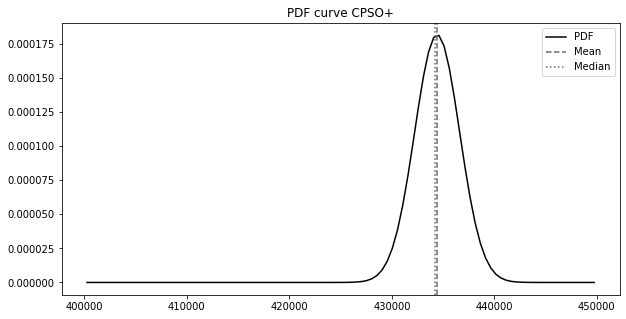

In [62]:
plot_pdf_graph(df=cpso_ex, bins=100, alg_name='CPSO+')

## SIB

In [9]:
sib_ex = pd.read_excel('experiment_result_sib_ex_2.xlsx', index_col=0)

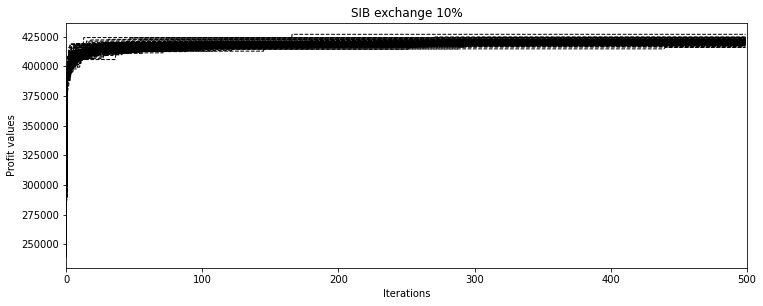

In [10]:
plot_graph(sib_ex[:-1], 'SIB exchange 10%')

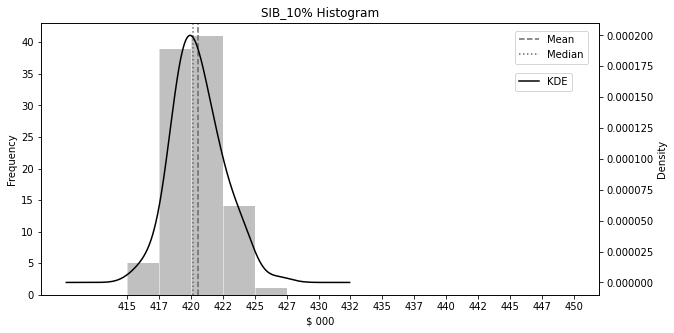

In [56]:
plot_histogram(data=sib_ex[:-1].iloc[-1][:], title='SIB_10% Histogram', bins=bins_15)

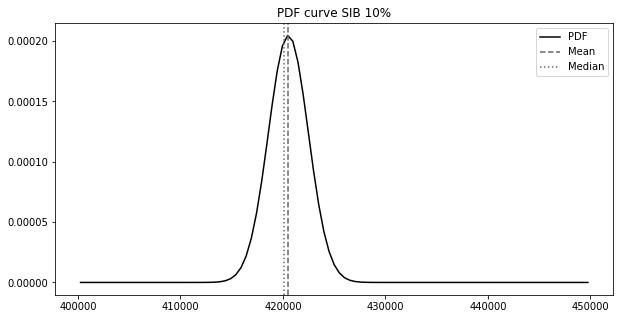

In [63]:
plot_pdf_graph(df=sib_ex,bins=100, alg_name='SIB 10%' )

In [12]:
sib_ex_20 = pd.read_excel('experiment_result_sib_ex_2_20.xlsx', index_col=0)

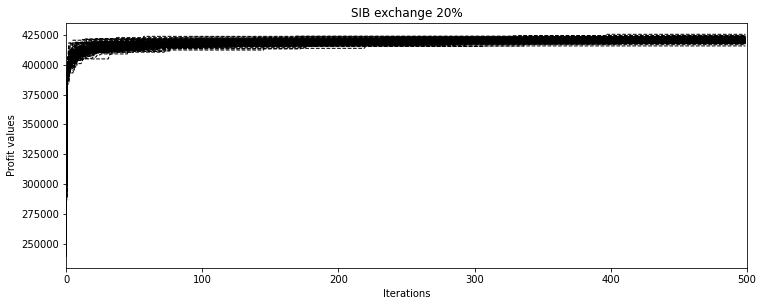

In [13]:
plot_graph(sib_ex_20[:-1], 'SIB exchange 20%')

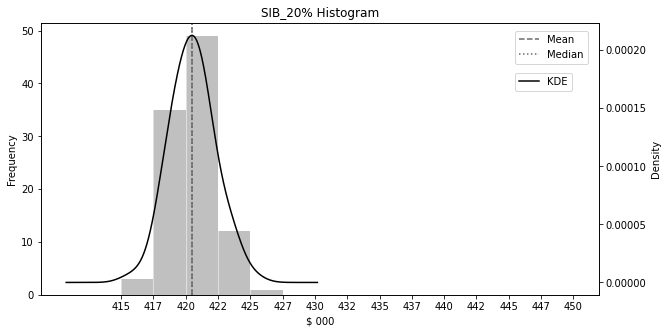

In [64]:
plot_histogram(data=sib_ex_20[:-1].iloc[-1][:], title='SIB_20% Histogram', bins=bins_15)

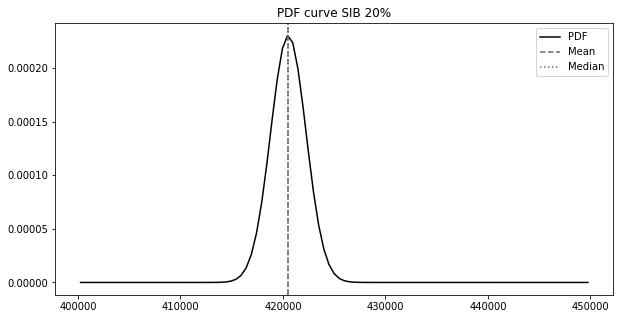

In [65]:
plot_pdf_graph(df=sib_ex_20,bins=100, alg_name='SIB 20%' )

In [15]:
sib_ex_30 = pd.read_excel('experiment_result_sib_ex_2_30.xlsx', index_col=0)

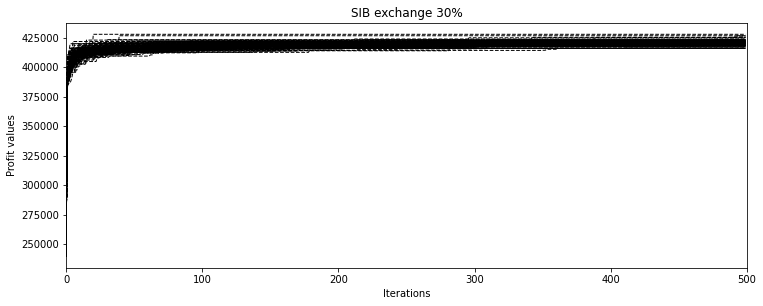

In [16]:
plot_graph(sib_ex_30[:-1], 'SIB exchange 30%')

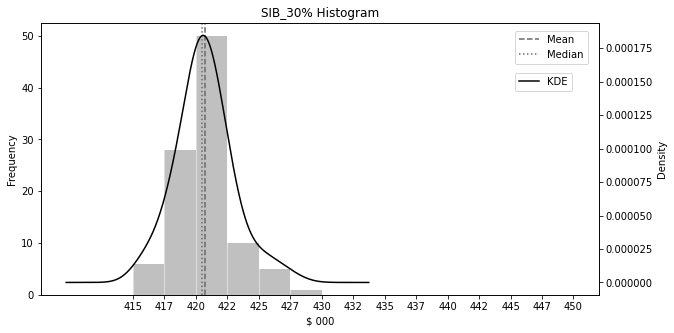

In [66]:
plot_histogram(data=sib_ex_30[:-1].iloc[-1][:], title='SIB_30% Histogram', bins=bins_15)

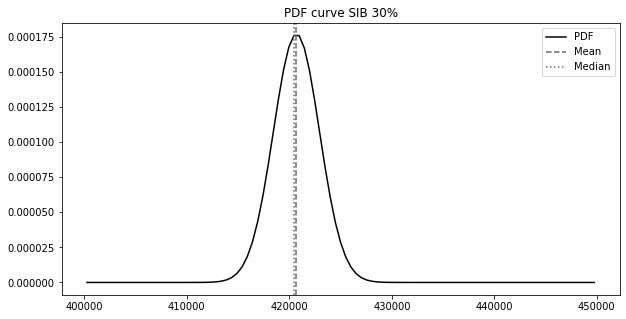

In [67]:
plot_pdf_graph(df=sib_ex_30, bins=100, alg_name='SIB 30%' )

In [18]:
sib_ex_40 = pd.read_excel('experiment_result_sib_ex_2_40.xlsx', index_col=0)

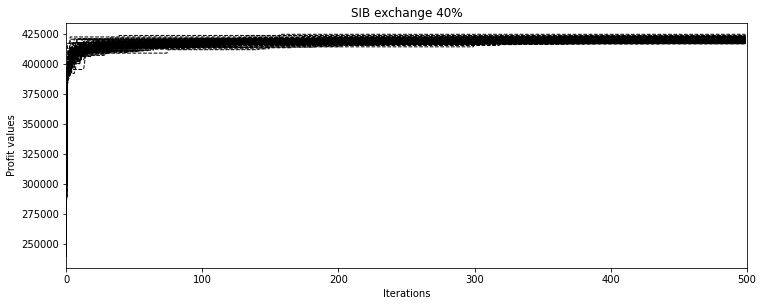

In [19]:
plot_graph(sib_ex_40[:-1], 'SIB exchange 40%')

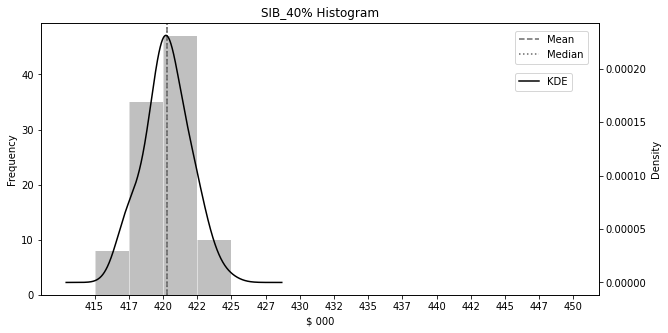

In [68]:
plot_histogram(data=sib_ex_40[:-1].iloc[-1][:], title='SIB_40% Histogram', bins=bins_15)

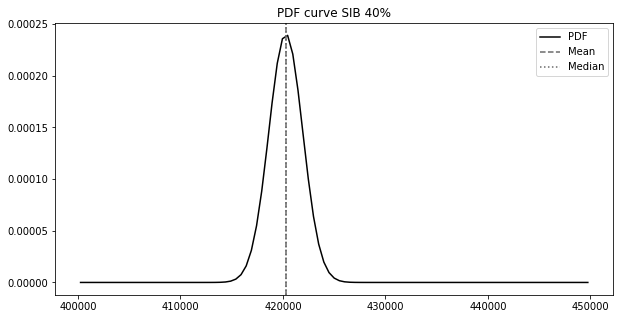

In [73]:
plot_pdf_graph(df=sib_ex_40, bins=100, alg_name='SIB 40%' )

## SIBv

In [21]:
sibv_ex = pd.read_excel('experiment_result_sibv_ex_2.xlsx', index_col=0, nrows=502)

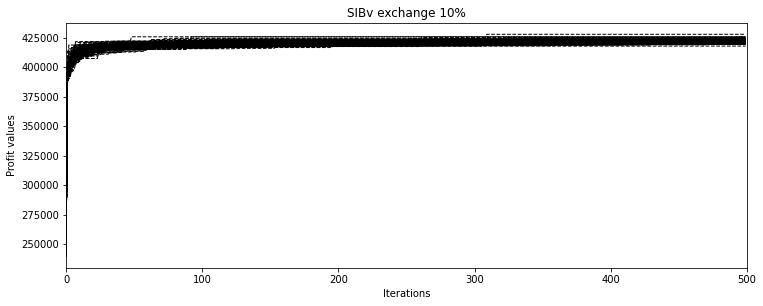

In [22]:
plot_graph(sibv_ex[:-1], 'SIBv exchange 10%')

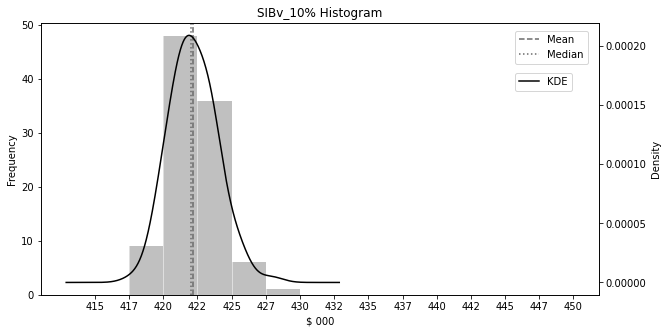

In [74]:
plot_histogram(data=sibv_ex[:-1].iloc[-1][:], title='SIBv_10% Histogram', bins=bins_15)

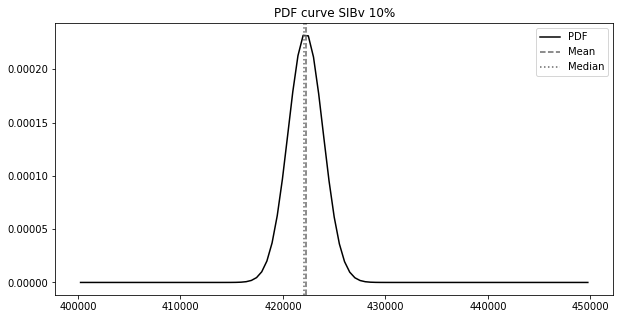

In [75]:
plot_pdf_graph(df=sibv_ex, bins=100, alg_name='SIBv 10%' )

In [24]:
sibv_ex_20 = pd.read_excel('experiment_result_sibv_ex_2_20.xlsx', index_col=0, nrows=502)

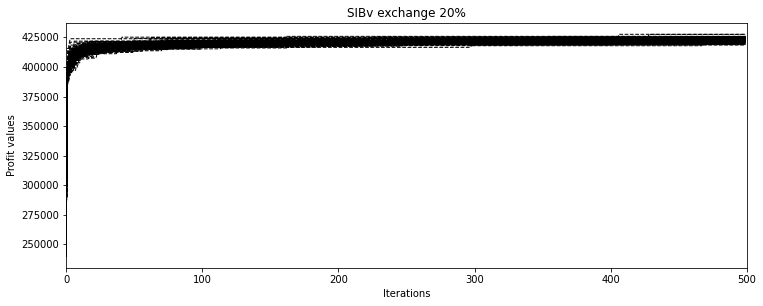

In [25]:
plot_graph(sibv_ex_20[:-1], 'SIBv exchange 20%')

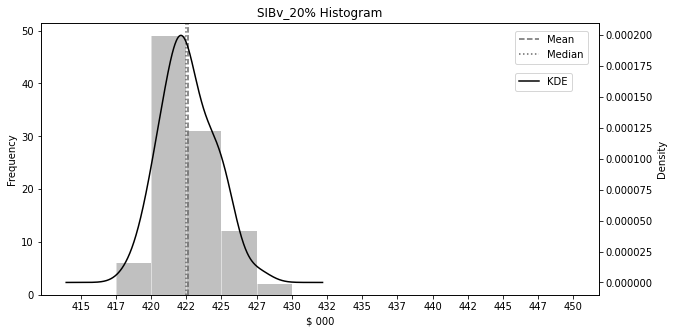

In [76]:
plot_histogram(data=sibv_ex_20[:-1].iloc[-1][:], title='SIBv_20% Histogram', bins=bins_15)

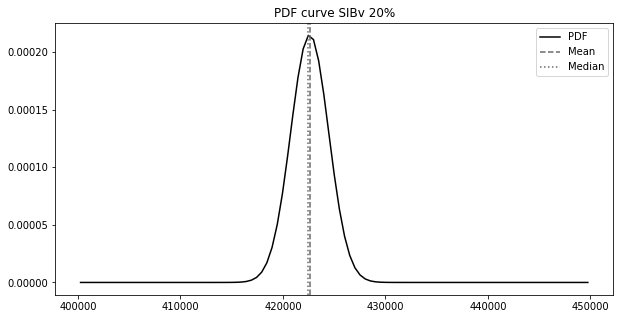

In [77]:
plot_pdf_graph(df=sibv_ex_20, bins=100, alg_name='SIBv 20%' )

In [27]:
sibv_ex_30 = pd.read_excel('experiment_result_sibv_ex_2_30.xlsx', index_col=0, nrows=502)

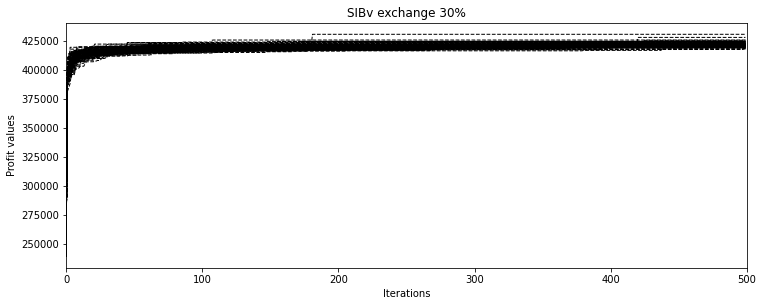

In [28]:
plot_graph(sibv_ex_30[:-1], 'SIBv exchange 30%')

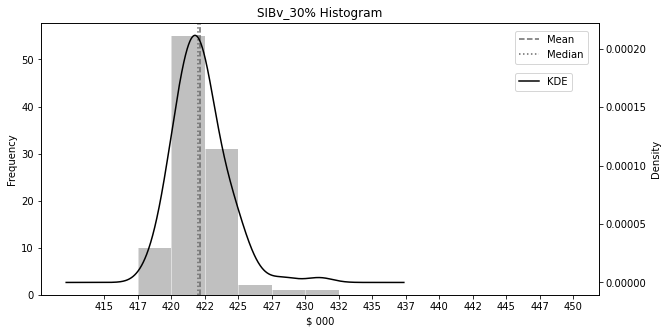

In [78]:
plot_histogram(data=sibv_ex_30[:-1].iloc[-1][:], title='SIBv_30% Histogram', bins=bins_15)

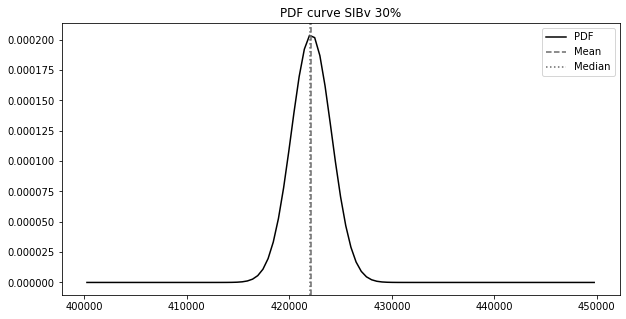

In [79]:
plot_pdf_graph(df=sibv_ex_30, bins=100, alg_name='SIBv 30%' )

In [30]:
sibv_ex_40 = pd.read_excel('experiment_result_sibv_ex_2_40.xlsx', index_col=0, nrows=502)

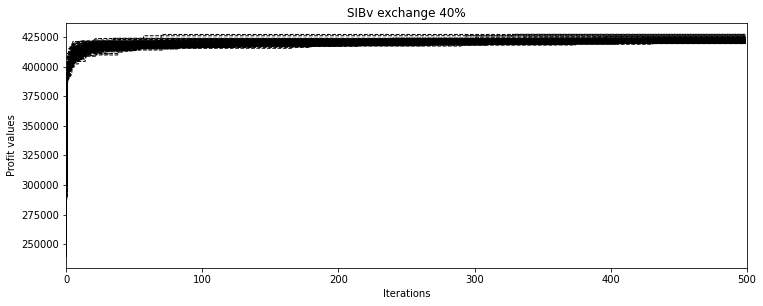

In [31]:
plot_graph(sibv_ex_40[:-1], 'SIBv exchange 40%')

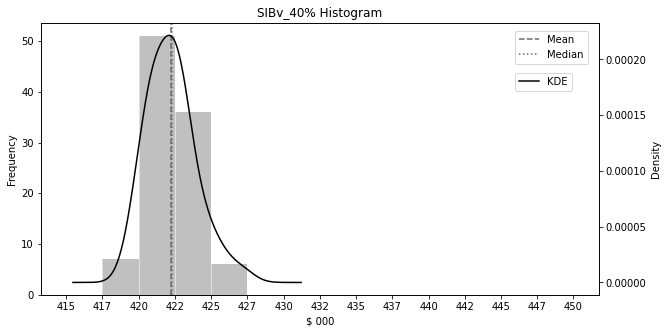

In [80]:
plot_histogram(data=sibv_ex_40[:-1].iloc[-1][:], title='SIBv_40% Histogram', bins=bins_15)

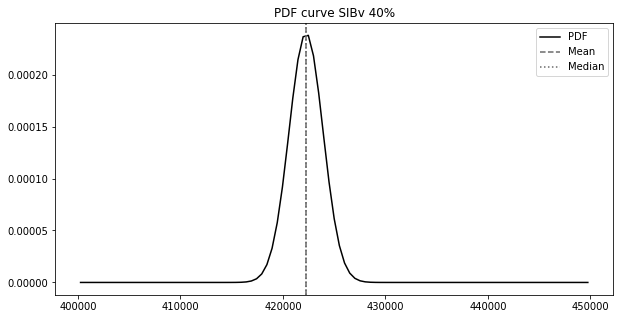

In [81]:
plot_pdf_graph(df=sibv_ex_40, bins=100, alg_name='SIBv 40%' )

## Summary

In [33]:
summary_table = pd.DataFrame(columns=['CPSO+', 'SIB_10%', 'SIB_20%','SIB_30%','SIB_40%',
                                        'SIBv_10%','SIBv_20%','SIBv_30%','SIBv_40%'], 
                        index=['Max', 'Min', 'Mean', 'Median', 'StdDev'])

In [34]:
summary_table['CPSO+'] = get_stats(cpso_ex[:-1])
summary_table['SIB_10%'] = get_stats(sib_ex[:-1])
summary_table['SIB_20%'] = get_stats(sib_ex_20[:-1])
summary_table['SIB_30%'] = get_stats(sib_ex_30[:-1])
summary_table['SIB_40%'] = get_stats(sib_ex_40[:-1])
summary_table['SIBv_10%'] = get_stats(sibv_ex[:-1])
summary_table['SIBv_20%'] = get_stats(sibv_ex_20[:-1])
summary_table['SIBv_30%'] = get_stats(sibv_ex_30[:-1])
summary_table['SIBv_40%'] = get_stats(sibv_ex_40[:-1])

In [35]:
summary_table

,CPSO+,SIB_10%,SIB_20%,SIB_30%,SIB_40%,SIBv_10%,SIBv_20%,SIBv_30%,SIBv_40%
Max,440007.3900,426884.7100,425336.1100,427725.2800,424743.6000,427883.0700,427628.6700,431048.7000,427275.5300
Min,427141.3400,415776.8200,415620.7000,415707.1900,416866.1600,417899.3200,418524.8900,418452.9900,419402.5400
Mean,434421.5184,420529.0604,420526.1731,420694.5004,420276.6897,422210.1734,422608.3231,422152.0729,422252.9336
Median,434228.5200,420143.6900,420485.2050,420465.6050,420267.3800,422039.7050,422450.5550,421968.0450,422273.2000
StdDev,2196.0400,1947.6400,1730.0800,2253.6600,1659.6300,1704.3500,1856.3400,1951.8200,1662.9100


In [36]:
summary_table.loc['Max'].max(), summary_table.loc['Min'].min()


(440007.39, 415620.7)

In [37]:
summary_iterations = pd.DataFrame(columns=['CPSO+', 'SIB_10%', 'SIB_20%','SIB_30%','SIB_40%',
                                        'SIBv_10%','SIBv_20%','SIBv_30%','SIBv_40%'], 
                        index=['Max', 'Min', 'Mean', 'Median', 'StdDev'])

In [38]:
summary_iterations['CPSO+'] = get_iter_stats(cpso_ex[:-1])
summary_iterations['SIB_10%'] = get_iter_stats(sib_ex[:-1])
summary_iterations['SIB_20%'] = get_iter_stats(sib_ex_20[:-1])
summary_iterations['SIB_30%'] = get_iter_stats(sib_ex_30[:-1])
summary_iterations['SIB_40%'] = get_iter_stats(sib_ex_40[:-1])
summary_iterations['SIBv_10%'] = get_iter_stats(sibv_ex[:-1])
summary_iterations['SIBv_20%'] = get_iter_stats(sibv_ex_20[:-1])
summary_iterations['SIBv_30%'] = get_iter_stats(sibv_ex_30[:-1])
summary_iterations['SIBv_40%'] = get_iter_stats(sibv_ex_40[:-1])
summary_iterations

,CPSO+,SIB_10%,SIB_20%,SIB_30%,SIB_40%,SIBv_10%,SIBv_20%,SIBv_30%,SIBv_40%
Max,497.00,498.00,499.00,498.00,497.00,499.00,493.00,499.00,493.00
Min,17.00,4.00,5.00,5.00,3.00,7.00,3.00,18.00,5.00
Mean,101.42,211.52,249.46,243.25,246.81,263.80,248.50,255.52,260.39
Median,48.50,240.50,271.50,249.00,250.00,257.00,244.50,245.00,279.50
StdDev,122.78,133.24,148.41,158.62,154.45,152.09,130.91,137.73,139.12
